# SI 618 Project 1 - Data Visualization
- name: Sijun Tao
- uniquename: sijuntao

In [1]:
import numpy as np
import pandas as pd
import random
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)  
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)


<hr style="border: 1px solid #003262;" />

## Question 1: Instruction expenditure and education level

Does the amount of instruction expenditure effectively affect the education level?

### Q1-1: Does the proportion of instruction expenditure make an influence on education level?

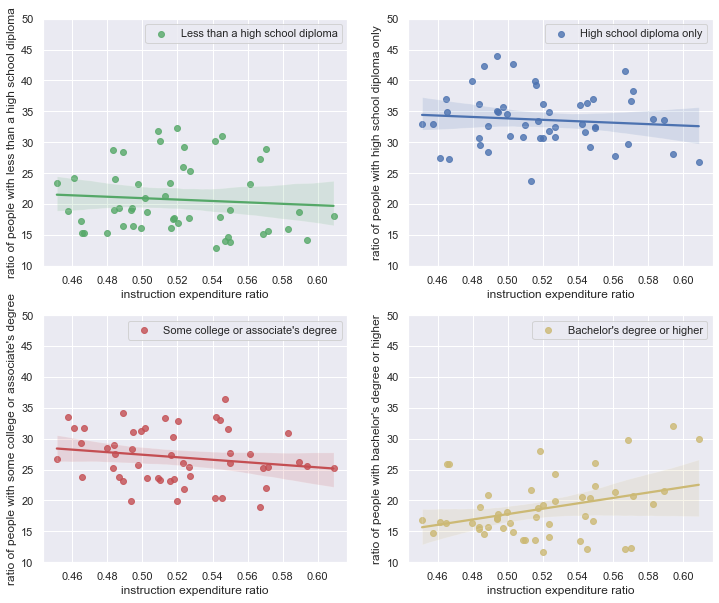

In [2]:
data = pd.read_csv("./data_sets/sijuntao_si618_project_q1-1.csv", header=None) \
         .rename(columns={0: "state", 1:"year", 2: "ins_expen_ratio", 3: "less_high_school",4:"equal_high_school",5:"state_equal_college",6:"state_greater_college"})
random.seed(5)
data = data[data["ins_expen_ratio"]>0.4]

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
ax = sns.regplot(x = "ins_expen_ratio",y = "less_high_school", data=data, marker="o", color="g")

plt.subplot(2,2,2)
ax2 = sns.regplot(x = "ins_expen_ratio",y = "equal_high_school", data=data, marker="o", color="b")

plt.subplot(2,2,3)
ax3 = sns.regplot(x = "ins_expen_ratio",y = "state_equal_college", data=data, marker="o", color="r")

plt.subplot(2,2,4)
ax4 = sns.regplot(x = "ins_expen_ratio",y = "state_greater_college", data=data, marker="o", color="y")

ax.legend(["Less than a high school diploma"])
ax2.legend(["High school diploma only"])
ax3.legend(["Some college or associate's degree"])
ax4.legend(["Bachelor's degree or higher"])
ax.set_ylim(10,50)
ax2.set_ylim(10,50)
ax3.set_ylim(10,50)
ax4.set_ylim(10,50)

ax.set(xlabel='instruction expenditure ratio', ylabel='ratio of people with less than a high school diploma')
ax2.set(xlabel='instruction expenditure ratio', ylabel='ratio of people with high school diploma only')
ax3.set(xlabel='instruction expenditure ratio', ylabel="ratio of people with some college or associate's degree")
ax4.set(xlabel='instruction expenditure ratio', ylabel="ratio of people with bachelor's degree or higher")

fig = ax.get_figure()
fig.savefig("./figure/Q1-1.png")

### Q1-2: Is the higher education level related to the higher instruction expenditure?

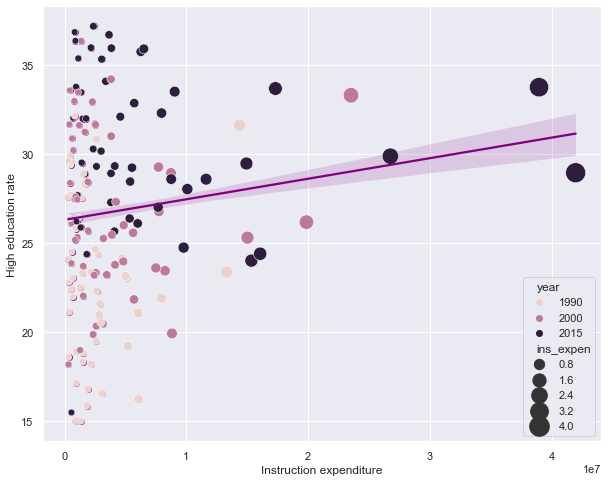

In [3]:
# here I consider 'some college or associate's degree' and 'bachelor's degree or higher' as high education level
data = pd.read_csv("./data_sets/sijuntao_si618_project_q1-2.csv", header=None) \
         .rename(columns={0: "state", 1: "year", 2: "ins_expen", 3: "high_education_rate"})

plt.figure(figsize=(10,8))
ax = sns.regplot(x="ins_expen", y="high_education_rate",data=data,color = "purple", ci = 50)
ax = sns.scatterplot(x="ins_expen", y="high_education_rate",data=data, size="ins_expen",sizes=(40, 400),hue="year")
ax.set(xlabel='Instruction expenditure', ylabel='High education rate')

fig = ax.get_figure()
fig.savefig("./figure/Q1-2.png")

<hr style="border: 1px solid #003262;" />

## Question 2: Instruction expenditure and unemployment rate

Does the amount of instruction expenditure affect infect the living standard of the local people (indicted by indictor `unemployement_rate`)?

### Q2-1: Does the proportion of instruction expenditure make an influence on unemployment rate?

/var/folders/10/lx3rh6q956qc768glw5ktj600000gn/T/ipykernel_4192/506593393.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample_states = random.sample(set(data["state"]), 3)


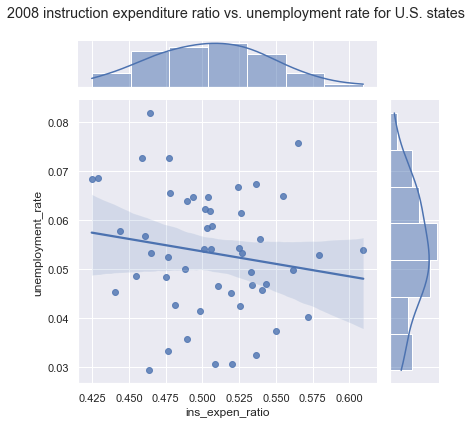

<Figure size 864x576 with 0 Axes>

In [4]:
data = pd.read_csv("./data_sets/sijuntao_si618_project_q2-1.csv", header=None) \
         .rename(columns={0: "state", 1:"year", 2: "ins_expen_ratio", 3: "unemployment_rate"})
data = data[data["year"] == 2008]
random.seed(5)
sample_states = random.sample(set(data["state"]), 3)
sample_data = data[[(c in sample_states) for c in data["state"]]]

ax = sns.jointplot(x = "ins_expen_ratio",y = "unemployment_rate", data=data, kind="reg")
ax.fig.suptitle("2008 instruction expenditure ratio vs. unemployment rate for U.S. states")
ax.fig.tight_layout()
ax.fig.subplots_adjust(top=0.9) # Reduce plot to make room 
plt.figure(figsize=(12,8))

ax.savefig("./figure/Q2-1.png")

### Q2-2: Is the lower unemployment rate related to the higher instruction expenditure?

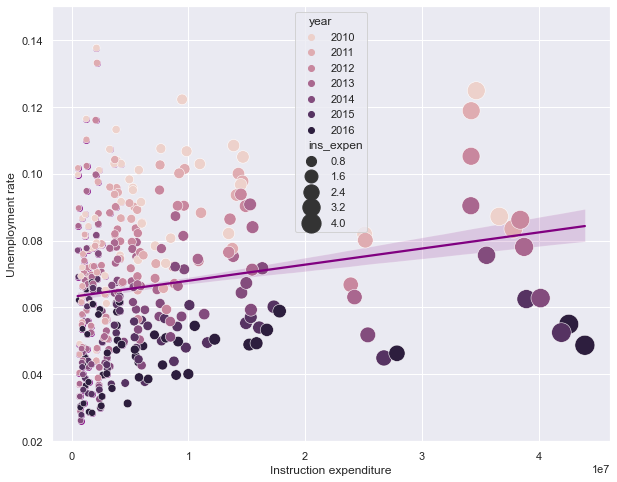

In [5]:
data = pd.read_csv("./data_sets/sijuntao_si618_project_q2-2.csv", header=None) \
         .rename(columns={0: "state", 1: "year", 2: "ins_expen", 3: "unemployment_rate"})
data = data[(data["year"]>=2010) & (data["year"]<=2016)]

plt.figure(figsize=(10,8))
ax = sns.regplot(x="ins_expen", y="unemployment_rate",data=data, color = "purple", ci = 60)
ax = sns.scatterplot(x="ins_expen", y="unemployment_rate",data=data, size="ins_expen",sizes=(40, 400),hue="year")
ax.set(xlabel='Instruction expenditure', ylabel='Unemployment rate')
ax.set_ylim(0.02,0.15)

fig = ax.get_figure()
fig.savefig("./figure/Q2-2.png")

<hr style="border: 1px solid #003262;" />

## Question 3: Expenditure and employment rate

Does the higher educational expenditure promote the employment rate?

### Q3-1: Does a higher instruction expenditure ratio lead to higher employment rate in the following years?

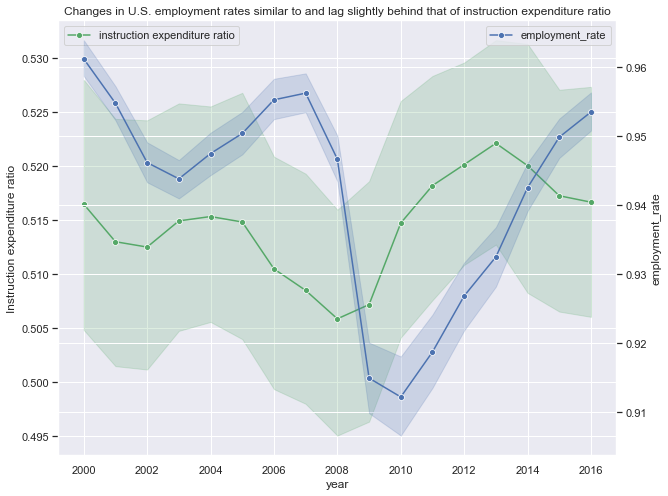

In [6]:
data = pd.read_csv("./data_sets/sijuntao_si618_project_q3-1.csv", header=None) \
         .rename(columns={0: "state", 1:"year", 2: "ins_expen", 3: "ins_expen_ratio",4:"employment_rate"})

plt.figure(figsize=(10,8))
ax = sns.lineplot(x="year", y="ins_expen_ratio",data=data,marker="o", color="g")
ax1 = sns.lineplot(x="year", y="employment_rate",data=data,marker="o", color="b",ax=plt.twinx())
ax.legend(["instruction expenditure ratio"], loc='upper left')
ax1.legend(["employment_rate"], loc='upper right')
ax.set(xlabel='year', ylabel='Instruction expenditure ratio')
ax1.set(xlabel='year', ylabel='employment_rate')
ax.set_title("Changes in U.S. employment rates similar to and lag slightly behind that of instruction expenditure ratio")
fig = ax.get_figure()
fig.savefig("./figure/Q3-1.png")

### Q3-2: Is the higher support service expenditure related to the higher employment rate?

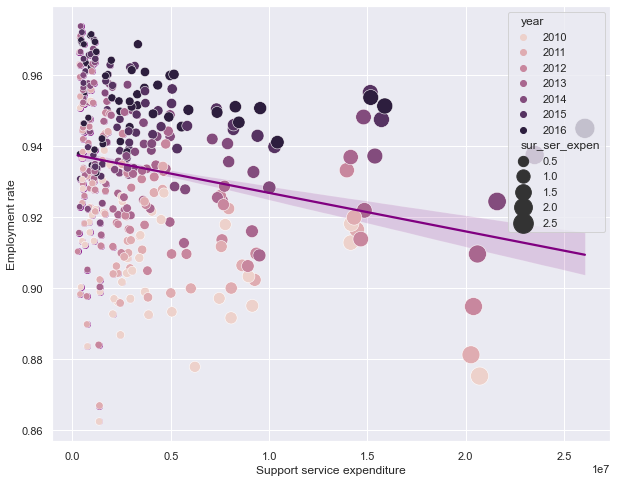

In [7]:
data = pd.read_csv("./data_sets/sijuntao_si618_project_q3-2.csv", header=None) \
         .rename(columns={0: "state", 1:"year", 2: "sur_ser_expen", 3: "sur_ser_expen_ratio",4:"employment_rate"})
data = data[(data["year"]>=2010) & (data["year"]<=2016)]

plt.figure(figsize=(10,8))
ax = sns.regplot(x="sur_ser_expen", y="employment_rate",data=data, color = "purple", ci = 60)
ax = sns.scatterplot(x="sur_ser_expen", y="employment_rate",data=data, size="sur_ser_expen",sizes=(40, 400),hue="year")
ax.set(xlabel='Support service expenditure', ylabel='Employment rate')

fig = ax.get_figure()
fig.savefig("./figure/Q3-2.png")